## Multiple Linear Regression

y = b0 + b1*x1 + b2*x2 + b3*x3 + ......... multiple linear regression



## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")

## Data Preparation EDA

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
!pip install missingno



In [7]:
import missingno as msno

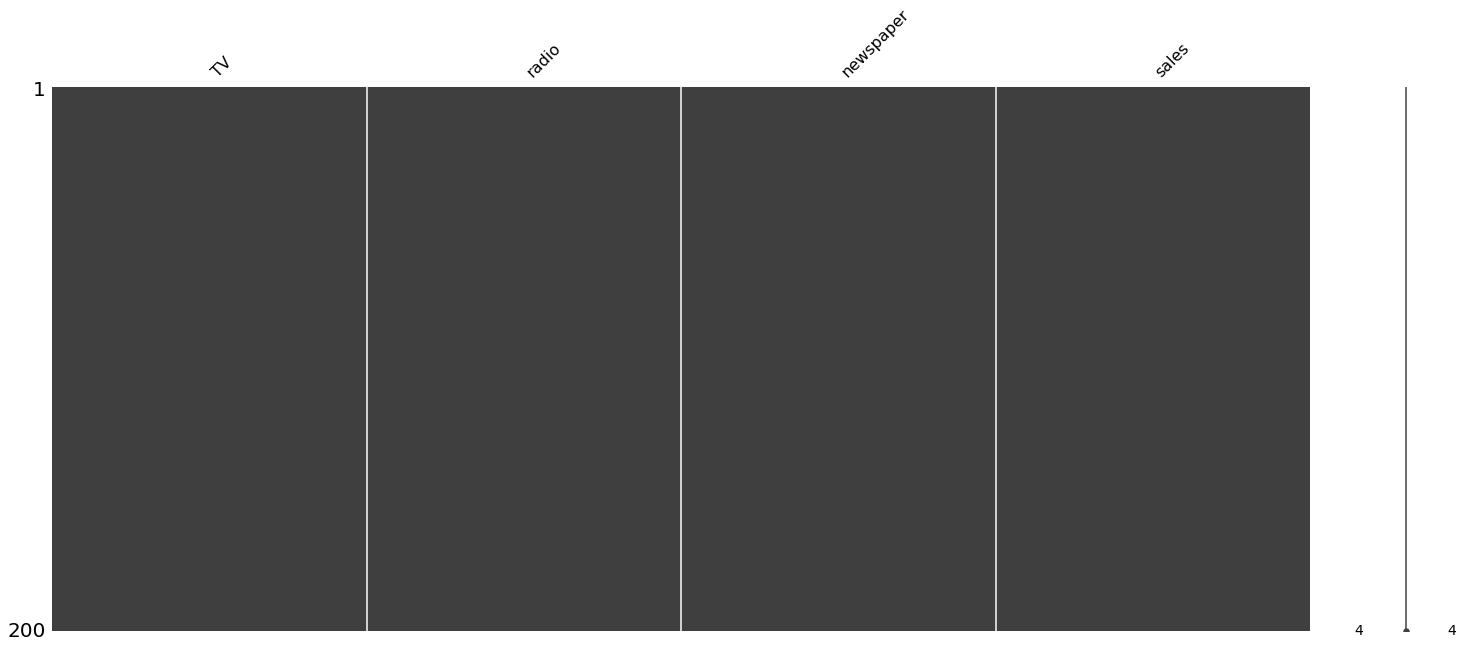

In [8]:
msno.matrix(df);

In [9]:
df.sort_values(by="sales",ascending=False)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
...,...,...,...,...
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
8,8.6,2.1,1.0,4.8
155,4.1,11.6,5.7,3.2


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [11]:
print(np.mean([100,110,120,115]))
print(np.std([100,110,120,115]))

111.25
7.39509972887452


In [12]:
print(np.mean([100,110,120,700]))
print(np.std([100,110,120,700]))

257.5
255.57533136044253


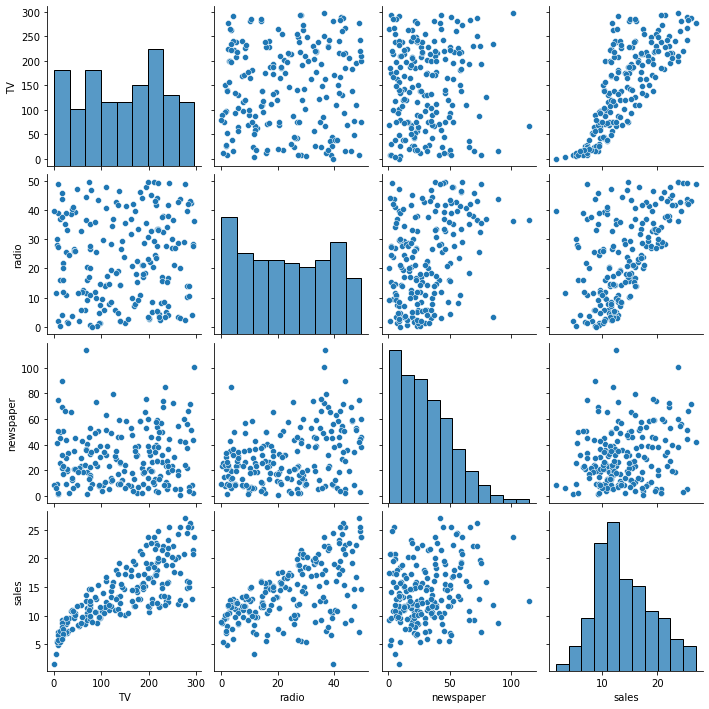

In [13]:
sns.pairplot(df);

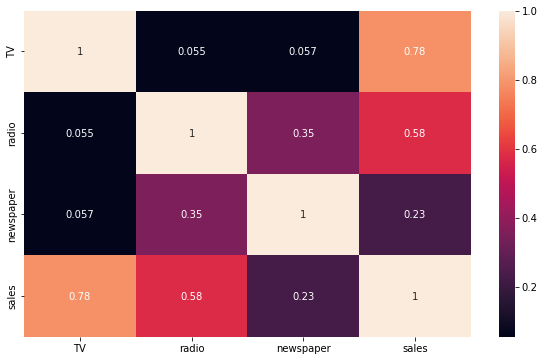

In [14]:
sns.heatmap(df.corr(), annot=True);

In [15]:
from scipy.stats import skew



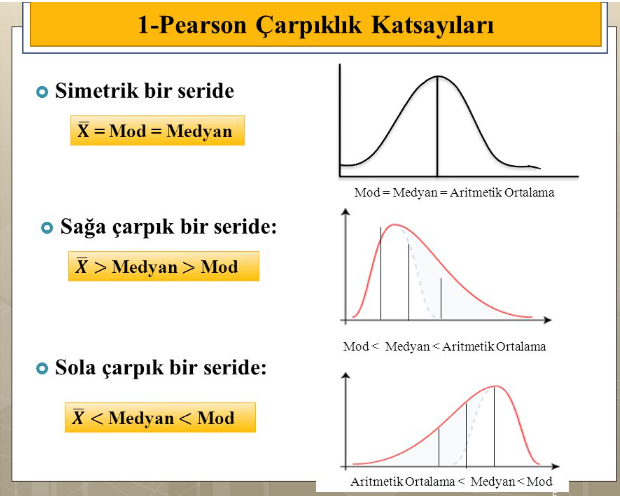

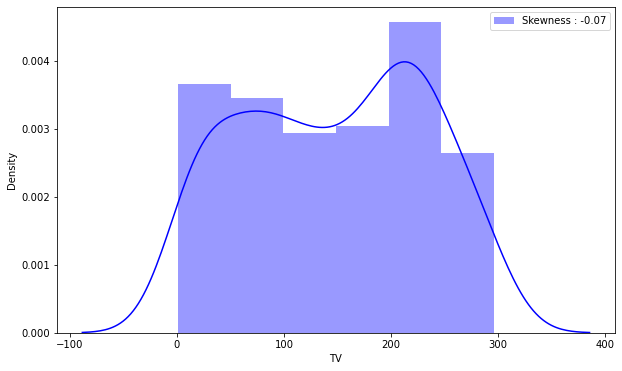

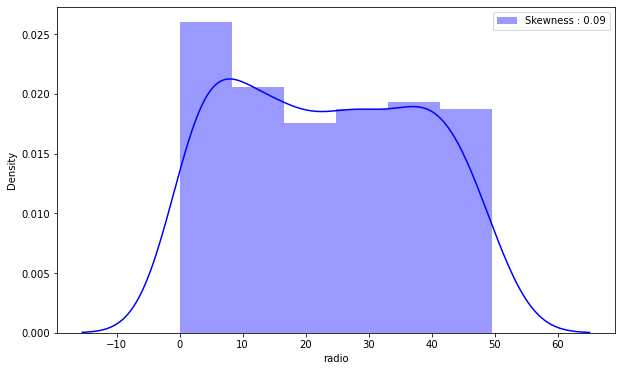

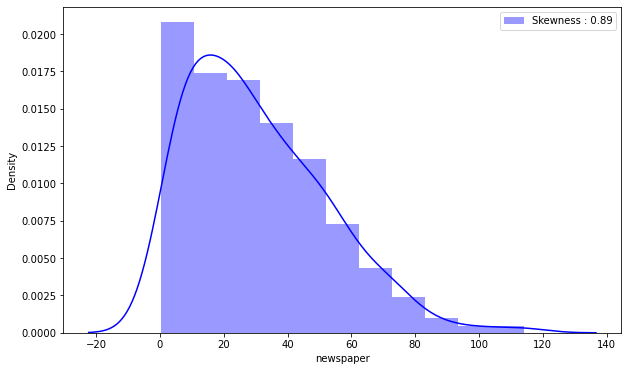

In [16]:
for j in df.drop(columns = "sales").columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()

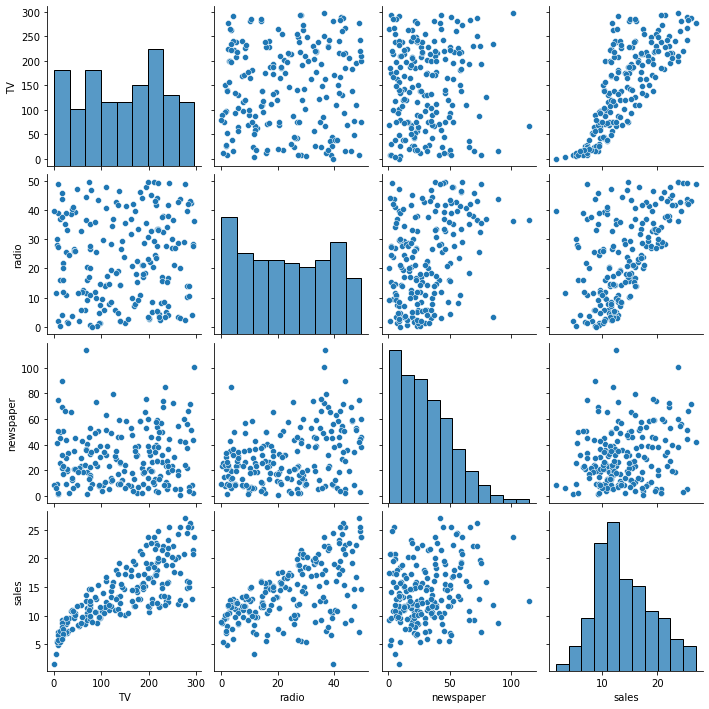

In [17]:
sns.pairplot(df);

In [18]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


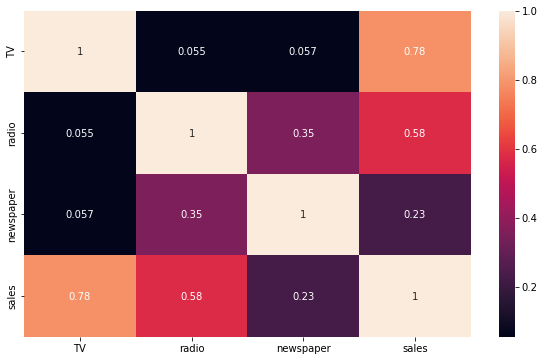

In [19]:
sns.heatmap(df.corr(), annot=True);

## Train - Test Split

data<1000 %70-80
data<100000 %80-90
data<1000000 %95
data>1000000 %99

the larger data set, the smaller the test set

In [20]:
!pip install scikit-learn

!pip install sklearn



In [21]:
X = df.drop(columns = "sales")
y= df["sales"]
print(X,y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [22]:
from sklearn.model_selection import train_test_split



In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [24]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
Y Test features shape : (60,)


In [25]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [26]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [27]:
from sklearn.linear_model import LinearRegression


In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred= model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [31]:
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [32]:
model.intercept_

2.7089490925159065

In [33]:
sum(X_test.loc[95] * model.coef_) + model.intercept_

16.565396297434837

In [34]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [35]:
result_sample= comparing.head(25)
result_sample

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


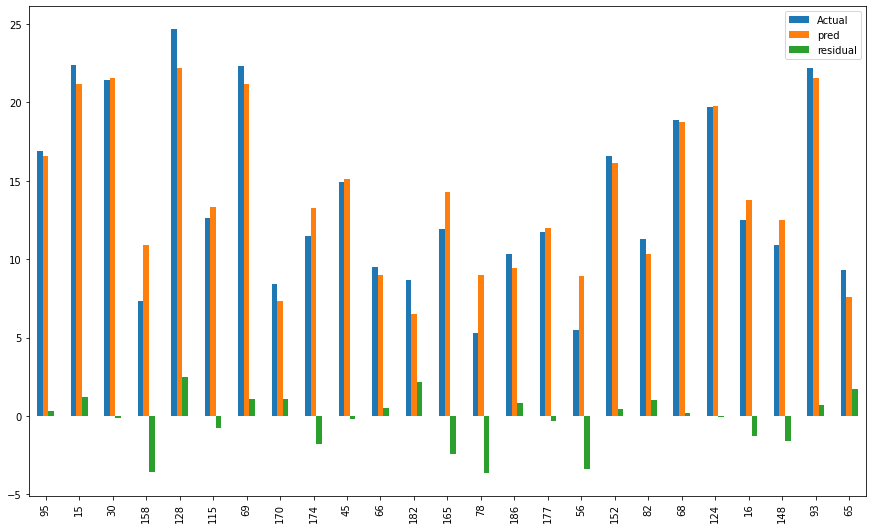

In [36]:
result_sample.plot(kind="bar", figsize=(15,9));

## Error Metrics

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
R2_score = r2_score(y_test,y_pred)
R2_score

0.8609466508230368

## What is the concept of punishment for RMSEA error metric?

In [39]:
mae= mean_absolute_error(y_test,y_pred)
mae

1.5116692224549089

In [40]:
mse = mean_squared_error(y_test,y_pred)
mse

3.796797236715219

In [41]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1.9485372043446385

In [42]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [43]:
mae/sales_mean

0.10780311802138767

In [44]:
rmse/sales_mean

0.13895790367941793

## Adjusted R2 Score (düzenlenmiş R2 skor)



In [45]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations gözlem
    p = df.shape[1]-1 # number of independent variables feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [46]:
adj_r2(y_test, y_pred, df)



0.8588182832335934

In [47]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = 50 # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [48]:
adj_r2(y_test, y_pred, df)



0.8142844531126464

## What is the concept of punishment for RMSE error metric?

In [49]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}
variables2 = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5800]} ## RMSE'nin hataları nasıl cezalandırdığını görmek için pred'in son değerini 3600 yaptım.

In [50]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [51]:
df_3 = pd.DataFrame(variables2)
df_3

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5800


In [52]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [53]:
df_3["residual"] = abs(df_3.Actual - df_3.pred)
df_3

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5800,800


In [54]:
df_2.residual.sum()/5

200.0

In [55]:
df_3.residual.sum()/5

300.0

In [56]:
((df_2.residual**2).sum()/5)**0.5

209.76176963403032

In [57]:
((df_3.residual**2).sum()/5)**0.5

392.42833740697165

## Evaluation Model

In [58]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [59]:
eval_metric(y_test, y_pred)



Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549089
MSE 		: 3.796797236715219
RMSE 		: 1.9485372043446385


In [60]:
y_train_pred = model.predict(X_train)



In [61]:
eval_metric(y_train, y_train_pred)



Model testing performance: 
---------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072533
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


## Is data suitable for linear regression?

In [62]:
residuals = y_test - y_pred



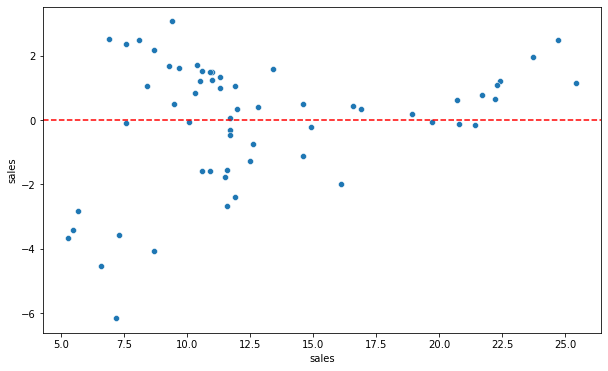

In [63]:
plt.figure(figsize= (10,6))
sns.scatterplot(x = y_test, y = residuals) # residuals
plt.axhline(y= 0, color = "r", linestyle = "--") #horizantal line
plt.show()

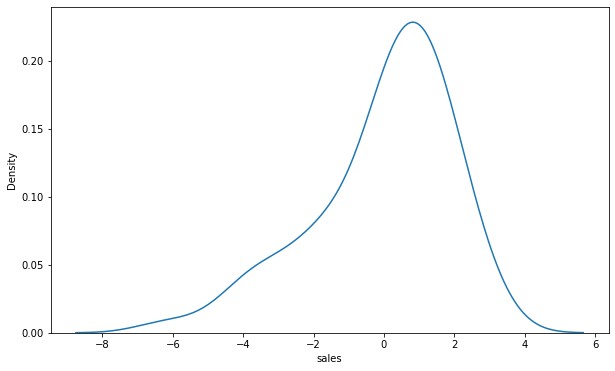

In [64]:
sns.kdeplot(residuals);

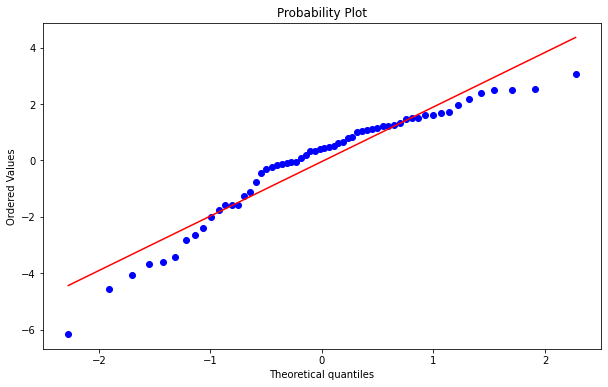

In [65]:
stats.probplot(residuals,dist="norm",plot=plt);

In [66]:
skew(residuals)

-0.9865673346742723

In [67]:
!pip install yellowbrick

In [68]:
from yellowbrick.regressor import ResidualsPlot

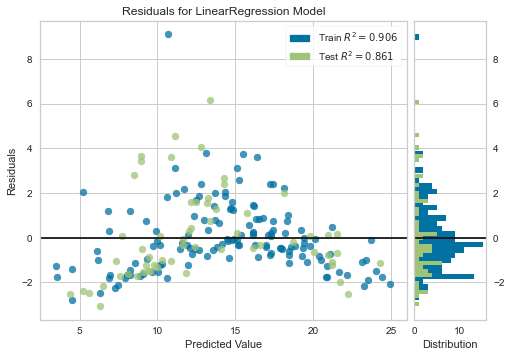

In [69]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();           # Finalize and render the figure

In [70]:
from yellowbrick.regressor import PredictionError

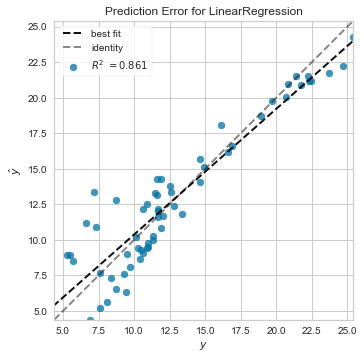

In [71]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();           # Finalize and render the figure

 ## Retraining Model on Full Data

In [72]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [73]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [74]:
final_model.intercept_

2.9388893694594085

In [76]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [77]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction o New Data

In [78]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [79]:
adv = [[150, 20, 15]]
adv

[[150, 20, 15]]

In [81]:
final_model.predict(adv)

array([13.55862413])

In [82]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [83]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_  # yeni datanın değerini manuel olarak salamasını yaptık.

13.558624130495994

In [84]:
adv_2 = [[150, 20, 15], [160, 20, 15]] # iki data verdik fakat ikinci data da 150 yerine 160

In [85]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])